## Exploratory Data Analysis

In [27]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Set requirements
#! cd ..
! pip freeze > '../requirements.txt'

In [29]:
pwd()

'/Users/hank/Documents/UChicago/DataMining'

In [30]:
# Set path
#DATA_PATH = ''
DATA_PATH = ''
data = pd.read_csv(os.path.join(DATA_PATH,'Train.csv'))

In [31]:
# Initial inspection
data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [32]:
# Inspect columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [33]:
# Drop ID
data.drop('ID', axis=1, inplace=True)

In [34]:
# Set themes
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("deep")

# Create functions to perform EDA
# Numerical variable
def num_eda(data, feature, target, axis_label_size=None):
    f, axs = plt.subplots(2, 1, figsize=(6,8))
    sns.histplot(data, x=feature, ax=axs[0])
    sns.boxplot(x=target, y=feature, data=data, ax=axs[1])
    f.tight_layout() 

    axs[0].set_xlabel(feature, fontsize=axis_label_size)
    axs[0].set_ylabel('Frequency', fontsize=axis_label_size)
    axs[1].set_xlabel(target, fontsize=axis_label_size)
    axs[1].set_ylabel(feature, fontsize=axis_label_size)
    
    print(f'% NA: {np.average(data[feature].isna())*100} %')

# Categorical variables

def cat_eda(data, feature, target, rotation=0, xtick_label_size=None, axis_label_size=None ):
    f, axs = plt.subplots(2, 1, figsize=(6, 8))

    sns.histplot(data, x=feature, ax=axs[0])
    axs[0].tick_params(axis='x', labelsize=xtick_label_size)
    if rotation != 0:
        axs[0].set_xticks(axs[0].get_xticks())
        axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=rotation, ha='right')  

    sns.barplot(data=data, estimator='mean', x=feature, y=target, ax=axs[1], alpha=.7)
    axs[1].tick_params(axis='x', labelsize=xtick_label_size)
    if rotation != 0:

        axs[1].set_xticks(axs[1].get_xticks())
        axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=rotation, ha='right')  

    f.tight_layout()   

    axs[0].set_xlabel(feature, fontsize=axis_label_size)
    axs[0].set_ylabel('Frequency', fontsize=axis_label_size)
    axs[1].set_xlabel(feature, fontsize=axis_label_size)
    axs[1].set_ylabel('Mean of ' + target, fontsize=axis_label_size)

    print(f'Categories: {data[feature].value_counts()} ')
    print(f'% NA: {np.average(data[feature].isna()) * 100} %')
 

### Target variable

Class imbalance:


income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

----------------------------------- 

Percentages:


income_above_limit
Below limit    0.937957
Above limit    0.062043
Name: proportion, dtype: float64

----------------------------------- 



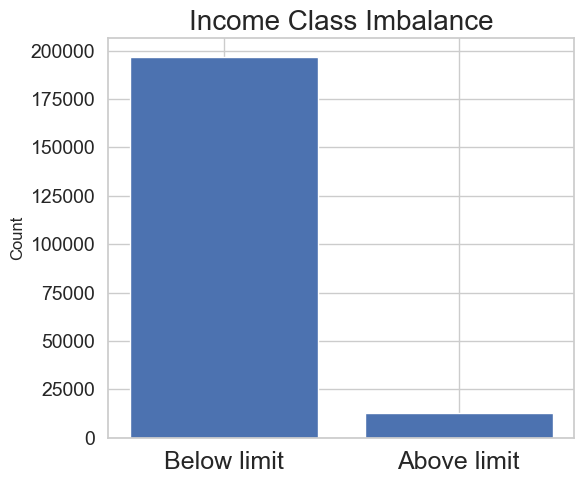

In [40]:
# Have a deeper look at the class imbalance and visualize for better perspective.
print('Class imbalance:')
display(data['income_above_limit'].value_counts())
print('----------------------------------- \n')
print('Percentages:')
display(data['income_above_limit'].value_counts(normalize=True))
print('----------------------------------- \n')

# Count the occurrences of each value
income_value_counts = data['income_above_limit'].value_counts()

# Bar chart showing the class imbalance.
plt.figure(figsize=(6, 5))  # Adjust figure size as needed
plt.bar(income_value_counts.index, income_value_counts.values ) 
plt.ylabel("Count")
plt.title("Income Class Imbalance", fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=14)

plt.xticks(rotation=0)  # Ensure readable x-axis labels
plt.tight_layout()
plt.show()

In [41]:
# Convert variable into numeric
data['income_above_limit_orig'] = data.income_above_limit
data.income_above_limit = np.where(data.income_above_limit == 'Above limit',1,0)

In [42]:
# Balancing may be necessary due to inbalance. Will consider in modeling process
strategy={'income_above_limit':'Try re-balancing techique'}

### Variable 'Age"

% NA: 0.0 %


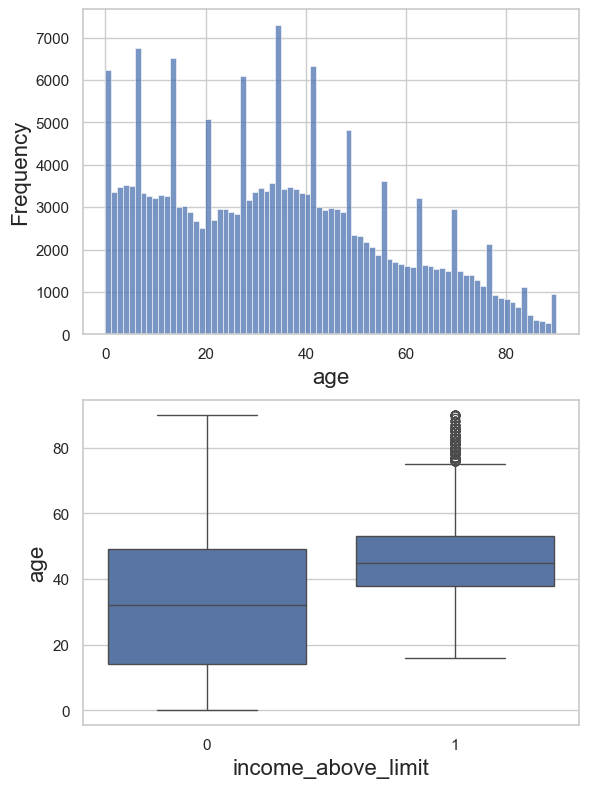

In [43]:
num_eda(data,'age','income_above_limit', 16)

We only need to consider people who are of age to earn wages/salary. 

In [44]:
data_18 = data.loc[data.age>=18]

% NA: 0.0 %


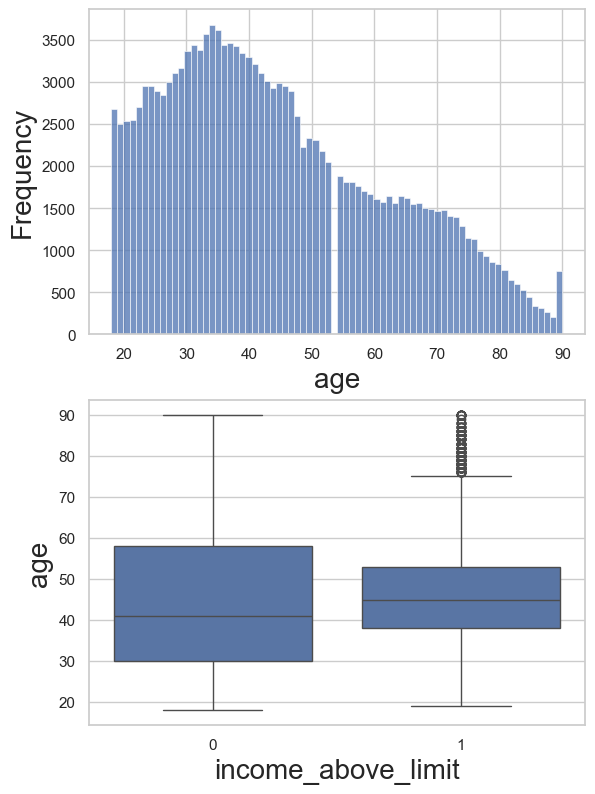

In [50]:
num_eda(data_18,'age','income_above_limit', 20)

In [46]:
strategy['age']='Drop les than 18. We will cut age into bins [18,24,32,45,62,] and use OneHotEncoder. Imputation strategy: Impute with the the most often for deployment.'
# Age will be OneHotEncoded because we want an explainable model. Age is a numerical variable but its effect on income is non-linear. Explainability is tough when numerical relationships are not linear, so we will convert to bins. 

Class imbalance after dropping adults:


income_above_limit_orig
Below limit    137916
Above limit     12996
Name: count, dtype: int64

----------------------------------- 

Percentages:


income_above_limit_orig
Below limit    0.913884
Above limit    0.086116
Name: proportion, dtype: float64

----------------------------------- 



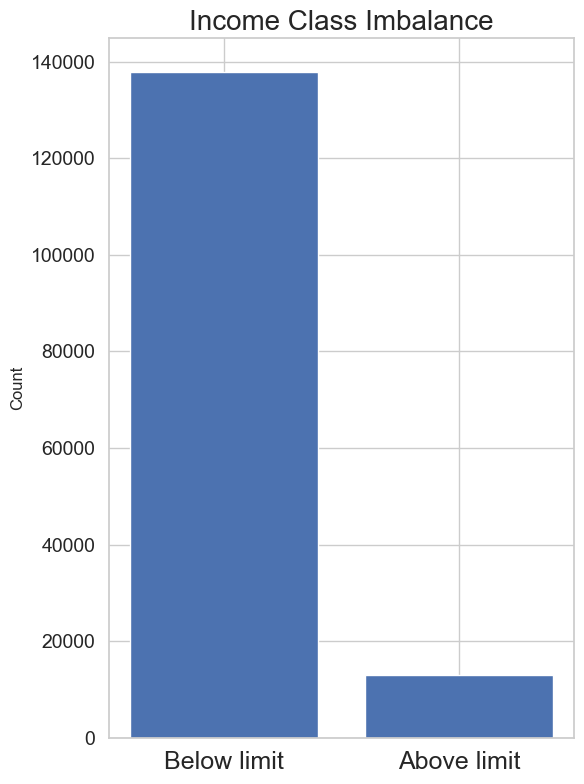

In [48]:
# Re-examine class inbalance after dropping children 
print('Class imbalance after dropping adults:')
display(data_18['income_above_limit_orig'].value_counts())
print('----------------------------------- \n')
print('Percentages:')
display(data_18['income_above_limit_orig'].value_counts(normalize=True))
print('----------------------------------- \n')

# Count the occurrences of each value
income_value_counts = data_18['income_above_limit_orig'].value_counts()

# Bar chart showing the class imbalance.
plt.figure(figsize=(6, 8))  # Adjust figure size as needed
plt.bar(income_value_counts.index, income_value_counts.values ) 
plt.ylabel("Count")
plt.title("Income Class Imbalance", fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=14)

plt.xticks(rotation=0)  # Ensure readable x-axis labels
plt.tight_layout()
plt.show()

### Variable 'gender'

Categories: gender
 Female    79945
 Male      70967
Name: count, dtype: int64 
% NA: 0.0 %


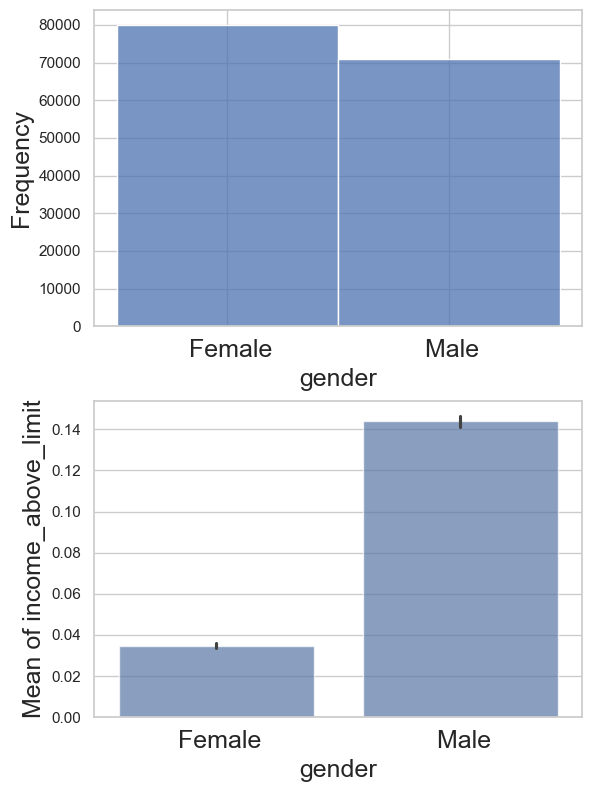

In [57]:
cat_eda(data_18,'gender','income_above_limit',0, 18, 18)

In [14]:
strategy['gender']='Production: drop due to discrimination'

### Variable 'education'

Categories: education
 High school graduate                      50547
 Some college but no degree                29293
 Bachelors degree(BA AB BS)                20977
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 7th and 8th grade                          6724
 11th grade                                 5874
 Associates degree-occup /vocational        5650
 10th grade                                 5331
 Associates degree-academic program         4494
 9th grade                                  3733
 5th or 6th grade                           3494
 12th grade no diploma                      2043
 1st 2nd 3rd or 4th grade                   1903
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         818
Name: count, dtype: int64 
% NA: 0.0 %


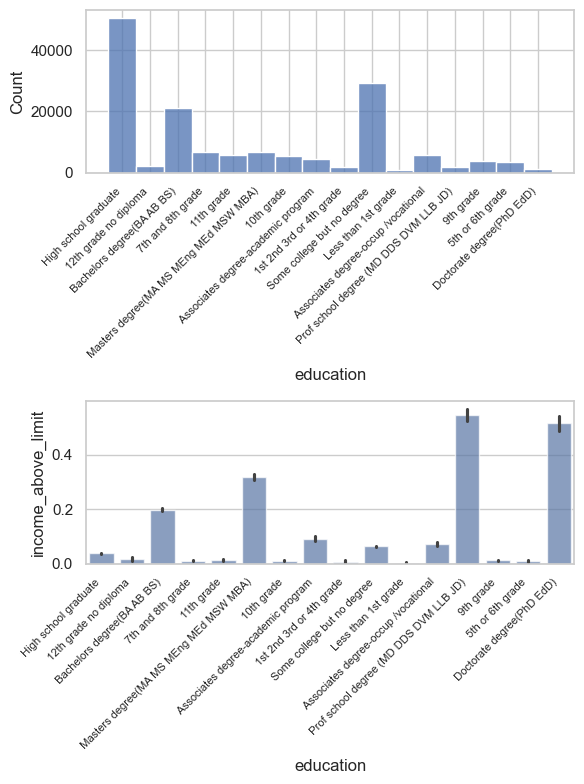

In [442]:
cat_eda(data_18,'education','income_above_limit',45, 8)

In [15]:
strategy['education']='Decrease graunularity with bins. Impute with the most often (for data in production). Use OneHotEncoder'

### Variable 'class'

Categories: class
 Private                           73388
 Self-employed-not incorporated     8827
 Local government                   8001
 State government                   4459
 Self-employed-incorporated         3404
 Federal government                 3035
 Never worked                        193
 Without pay                         146
Name: count, dtype: int64 
% NA: 32.773404368108565 %


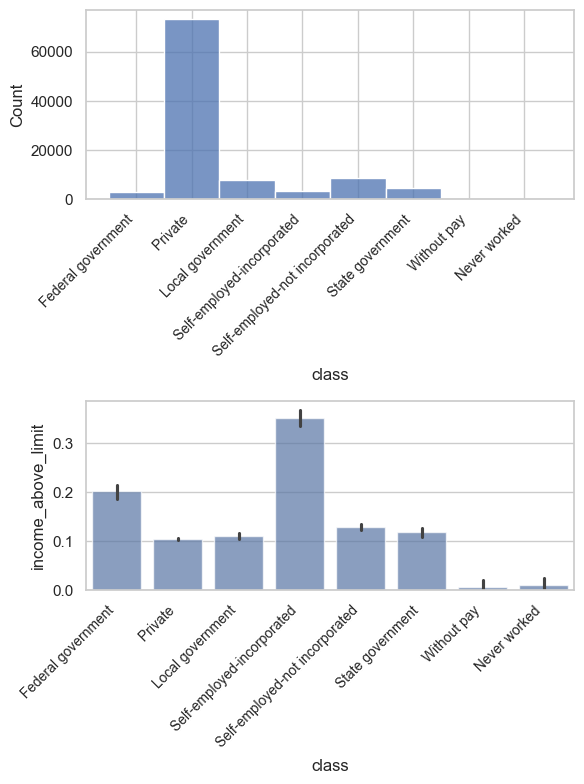

In [444]:
cat_eda(data_18,'class','income_above_limit',45, 10)

In [16]:
## The variable looks very important, but has 33% NA - Need to add NA as a separate cathegory 
strategy['class']='Add category NA; Use OneHotEncoder'

### Variable 'education_institute'

Categories: education_institute
 College or university    5988
 High school              1802
Name: count, dtype: int64 
% NA: 94.83805131467345 %


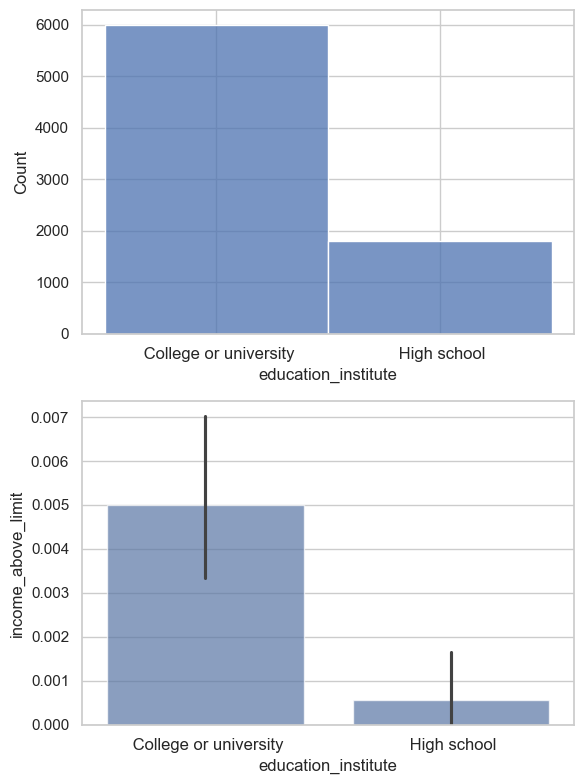

In [446]:
cat_eda(data_18,'education_institute','income_above_limit')

In [17]:
### The variable duplicate the previous one and has a ton of NAs. We can drop
strategy['education_institute']='Drop'
drop_col = []
drop_col.append('education_institute')

### Variable 'marital status'

Categories: marital_status
 Married-civilian spouse present    88353
 Never married                      32240
 Divorced                           13440
 Widowed                            11025
 Separated                           3576
 Married-spouse absent               1561
 Married-A F spouse present           717
Name: count, dtype: int64 
% NA: 0.0 %


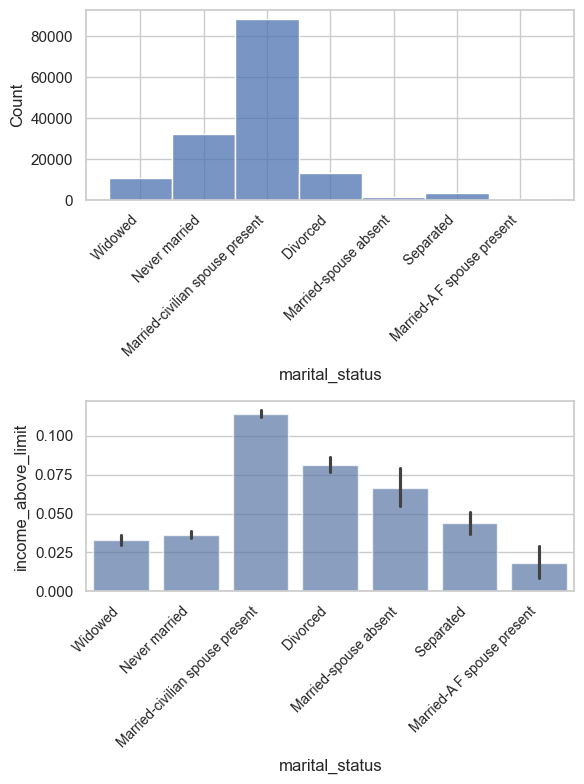

In [448]:
cat_eda(data_18,'marital_status','income_above_limit',45, 10)

In [18]:
strategy['marital_status']='Impute with the most often; Use OneHotEncoder'

### Variable 'race'

Categories: race
 White                          128938
 Black                           13921
 Asian or Pacific Islander        4262
 Other                            2306
 Amer Indian Aleut or Eskimo      1485
Name: count, dtype: int64 
% NA: 0.0 %


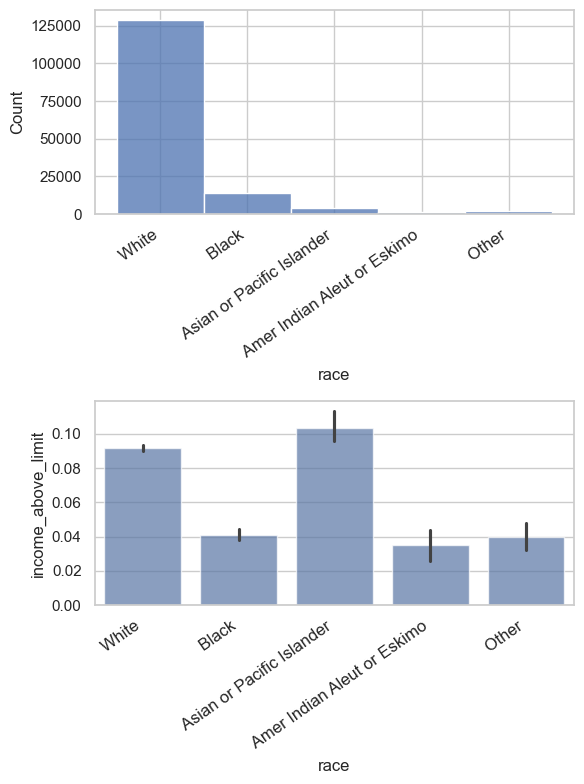

In [450]:
cat_eda(data_18,'race','income_above_limit',35)

In [19]:
strategy['race']='Drop for production model to avoid discrimination.'

### Variable 'is_hispanic'

Categories: is_hispanic
 All other                    132044
 Mexican (Mexicano)             5409
 Mexican-American               4451
 Central or South American      2943
 Puerto Rican                   2144
 Other Spanish                  1808
 Cuban                           999
 NA                              668
 Do not know                     242
 Chicano                         204
Name: count, dtype: int64 
% NA: 0.0 %


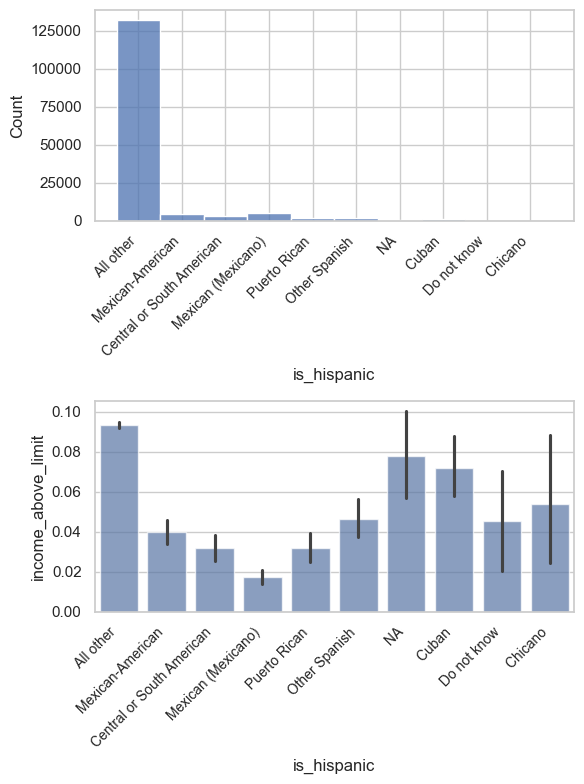

In [452]:
cat_eda(data_18,'is_hispanic','income_above_limit',45,10)

In [20]:
# Since there are so many sparse categories here, we will instead just convert this variable to a dummy: Is Hispanic or Not Hispanic 
strategy['is_hispanic']='Drop in production due to discrimination'

### Variable 'employment_commitment'

Categories: employment_commitment
 Children or Armed Forces              75696
 Full-time schedules                   41814
 Not in labor force                    25025
 PT for non-econ reasons usually FT     3499
 Unemployed full-time                   2477
 PT for econ reasons usually PT         1238
 Unemployed part- time                   630
 PT for econ reasons usually FT          533
Name: count, dtype: int64 
% NA: 0.0 %


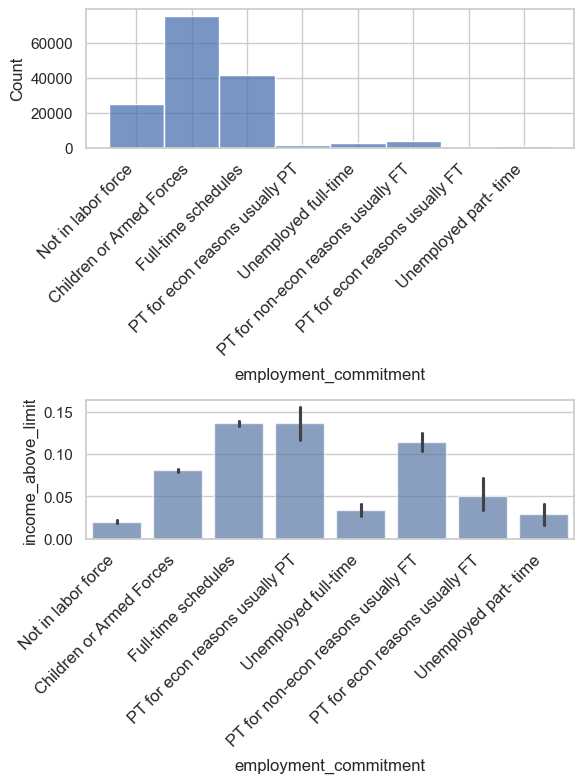

In [454]:
cat_eda(data_18,'employment_commitment','income_above_limit',45)

In [21]:
# We will bin this into Unemployed and Part-Time Employed due to sparse categories
strategy['employment_commitment']='Impute with the most often; Use OneHotEncoder'

### Variable 'unemployment_reason'

Categories: unemployment_reason
 Other job loser          2227
 Re-entrant               1905
 Job loser - on layoff    1021
 Job leaver                611
 New entrant               193
Name: count, dtype: int64 
% NA: 96.05266645462255 %


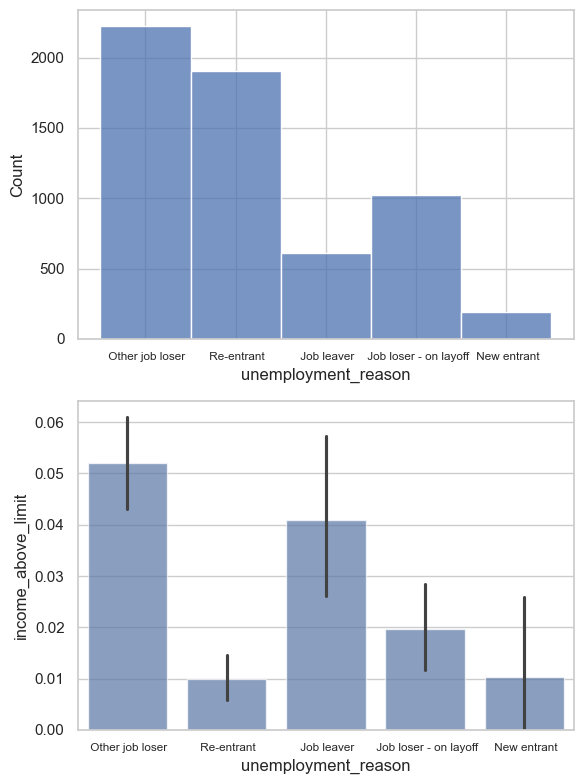

In [456]:
cat_eda(data_18,'unemployment_reason','income_above_limit',0, 8.5)

In [22]:
### The variable give more details to the previous one but is 96% NA. Will drop. 
strategy['unemployment_reason']='Drop'
drop_col.append('unemployment_reason')

### Variable 'employment_stat'

Categories: employment_stat
0    131505
2     16575
1      2832
Name: count, dtype: int64 
% NA: 0.0 %


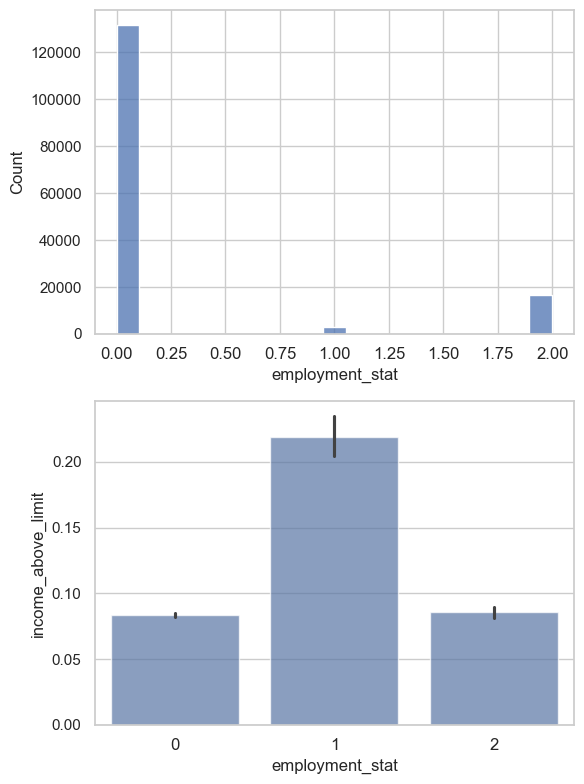

In [458]:
cat_eda(data_18,'employment_stat','income_above_limit')

In [24]:
## Can't find what exactly values mean.
strategy['employment_stat']='Impute with the most often'

### Variable 'wage_per_hour'

% NA: 0.0 %


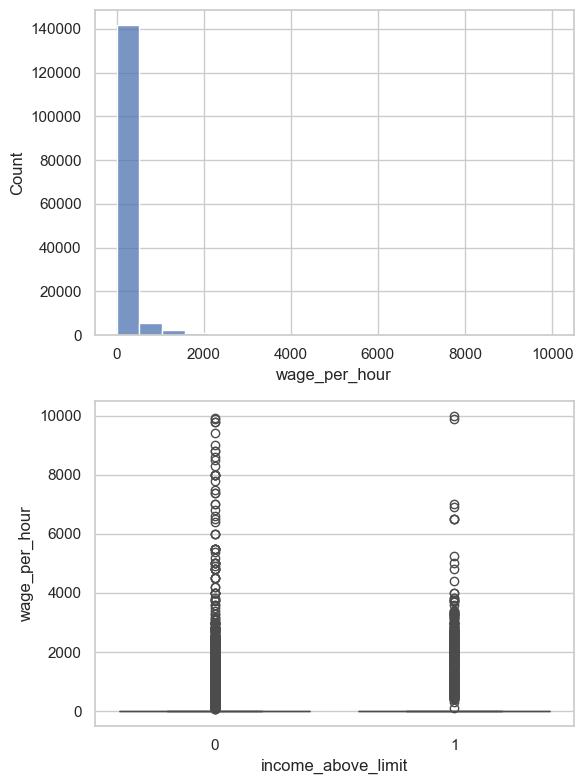

In [460]:
num_eda(data_18,'wage_per_hour','income_above_limit')

% NA: 0.0 %


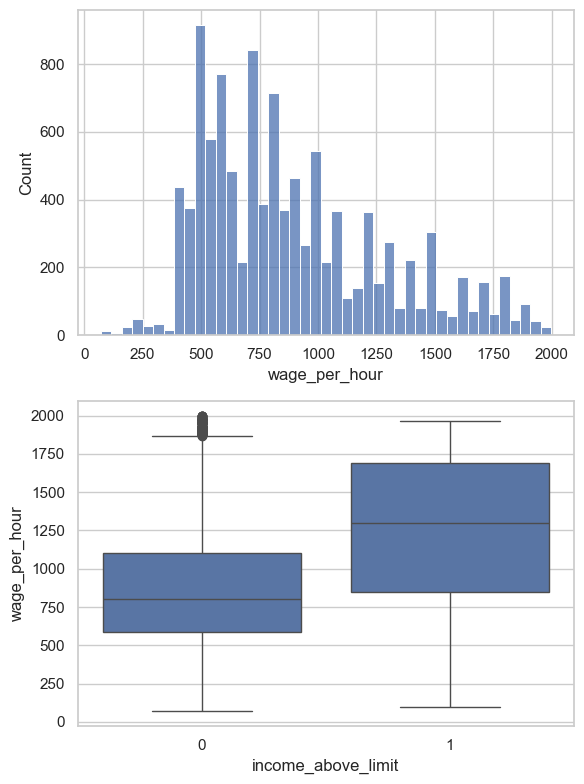

In [461]:
# Remove huge values and zeroes
num_eda(data_18.loc[(data_18.wage_per_hour<2000) & (data_18.wage_per_hour!=0)],'wage_per_hour','income_above_limit')

In [462]:
# Count zeroes
sum(data_18.wage_per_hour==0)

139465

In [25]:
# We will cut into bins because wage per hour definitely does not have a linear relationship w total income 
strategy['wage_per_hour']='Cut into bins; Use OneHotEncoder'

### Variable 'is_labor_union'

Categories: is_labor_union
 No     16521
Same     3099
Name: count, dtype: int64 
% NA: 86.99904580152672 %


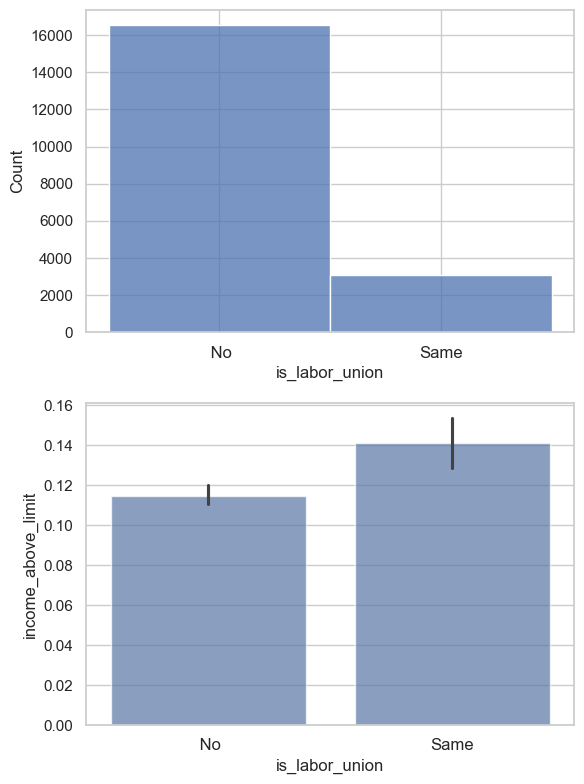

In [464]:
cat_eda(data_18,'is_labor_union','income_above_limit')

In [26]:
# Too many NAs, we have to drop
strategy['is_labor_union']='drop'
drop_col.append('is_labor_union')

### Variable 'working_week_per_year'

Categories: working_week_per_year
52    73199
0     45313
40     2808
50     2365
26     2248
48     1900
12     1566
30     1371
20     1291
36     1172
8       940
32      892
44      886
16      879
51      841
24      746
35      726
46      675
4       664
45      663
42      619
10      597
49      593
39      582
28      561
6       495
13      465
25      451
1       420
43      415
38      398
2       396
3       377
22      362
15      314
17      297
47      275
5       263
18      260
14      245
34      235
9       220
37      141
7       125
21      119
41       84
33       83
23       71
11       71
27       70
29       60
19       52
31       51
Name: count, dtype: int64 
% NA: 0.0 %


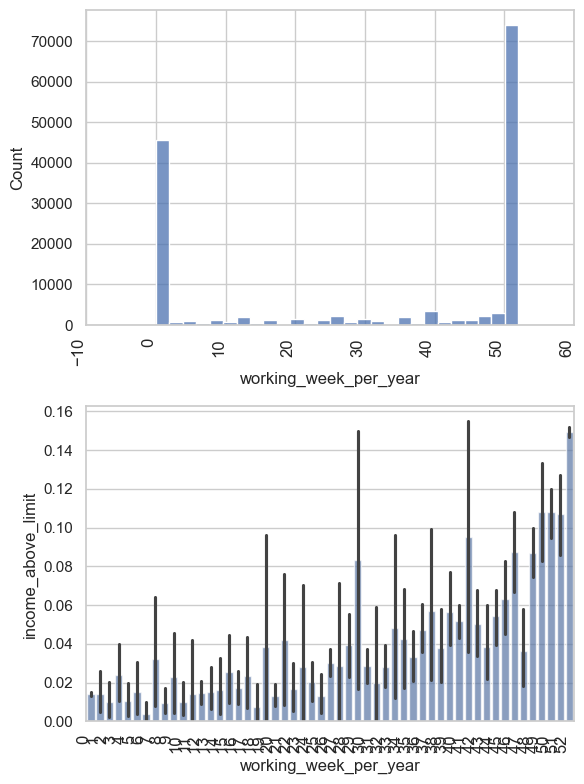

In [466]:
cat_eda(data_18,'working_week_per_year','income_above_limit',90)

In [27]:
# We will cut into bins via domain knowledge of full-time, part-time, etc., as this variable does not have a linear rel. with income 
strategy['working_week_per_year']='Cut into bins; Use OneHotEncoder'

### Variable 'industry_code'

Categories: industry_code
0     49652
33    16640
43     8646
4      6351
42     4889
45     4584
29     4406
37     4215
41     4084
32     3813
35     3449
39     2997
34     2858
44     2598
2      2174
11     1819
50     1756
38     1700
47     1696
40     1641
24     1532
19     1430
12     1399
30     1253
31     1233
25     1103
9      1022
22      989
13      965
36      885
1       819
48      644
3       637
27      621
21      602
49      590
5       574
23      566
8       560
6       550
16      540
18      481
15      468
7       462
14      294
46      199
17      169
28      152
26      137
20       32
51       32
10        4
Name: count, dtype: int64 
% NA: 0.0 %


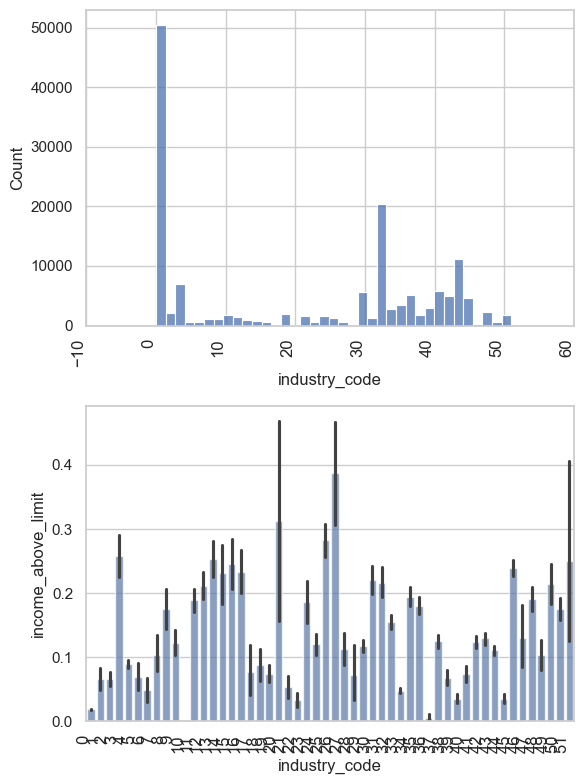

In [468]:
cat_eda(data_18,'industry_code','income_above_limit',90)

In [28]:
# Unclear what these codes are; they also seem redundant with the next column. Will drop
strategy['industry_code']='Drop'
drop_col.append('industry_code')

## Variable 'industry_code_main'

Categories: industry_code_main
 Not in universe or children            49652
 Retail trade                           16640
 Manufacturing-durable goods             9307
 Education                               8646
 Manufacturing-nondurable goods          7164
 Construction                            6351
 Finance insurance and real estate       6307
 Business and repair services            5915
 Medical except hospital                 4889
 Public administration                   4686
 Other professional services             4584
 Transportation                          4406
 Hospital services                       4084
 Wholesale trade                         3813
 Personal services except private HH     2997
 Agriculture                             2993
 Social services                         2598
 Entertainment                           1641
 Communications                          1253
 Utilities and sanitary services         1233
 Private household services               885
 Mi

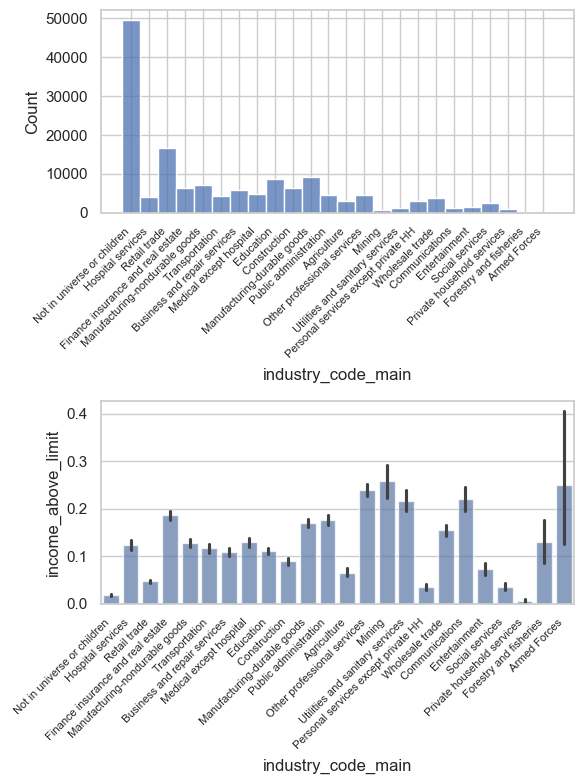

In [470]:
cat_eda(data_18,'industry_code_main','income_above_limit',45, 8)

In [29]:
# Only confusing part of this is the "Not in universe or children" category. 
strategy['industry_code_main']='OneHotEncoder'

### Variable 'occupation_code'

Categories: occupation_code
0     49652
2      9174
26     7964
19     5215
29     4757
36     4337
34     4270
10     3796
16     3584
33     3529
23     3486
12     3479
35     3358
3      3352
38     3197
31     2755
32     2417
37     2278
8      2223
30     1985
24     1922
17     1885
42     1881
28     1686
44     1505
41     1489
4      1435
43     1411
13     1322
18     1154
39     1025
14      943
5       904
15      861
25      816
7       772
9       771
27      747
40      657
11      653
1       569
21      542
6       446
22      437
45      177
20       62
46       32
Name: count, dtype: int64 
% NA: 0.0 %


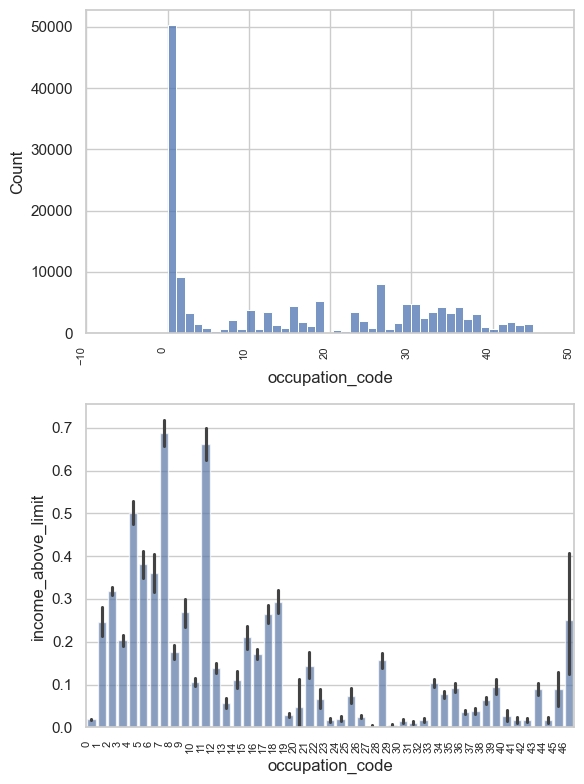

In [472]:
cat_eda(data_18,'occupation_code','income_above_limit',90, 8)

In [473]:
# Unclear what these codes are; they also seem redundant with the next column. Will drop
strategy['occupation_code']='Drop'
drop_col.append('occupation_code')

### Variable 'occupation_code_main'

Categories: occupation_code_main
 Adm support including clerical           15167
 Professional specialty                   14479
 Executive admin and managerial           13095
 Other service                            11914
 Sales                                    11900
 Precision production craft & repair      11157
 Machine operators assmblrs & inspctrs     6615
 Transportation and material moving        4222
 Handlers equip cleaners etc               4027
 Technicians and related support           3126
 Farming forestry and fishing              3093
 Protective services                       1686
 Private household services                 747
 Armed Forces                                32
Name: count, dtype: int64 
% NA: 32.90129346904156 %


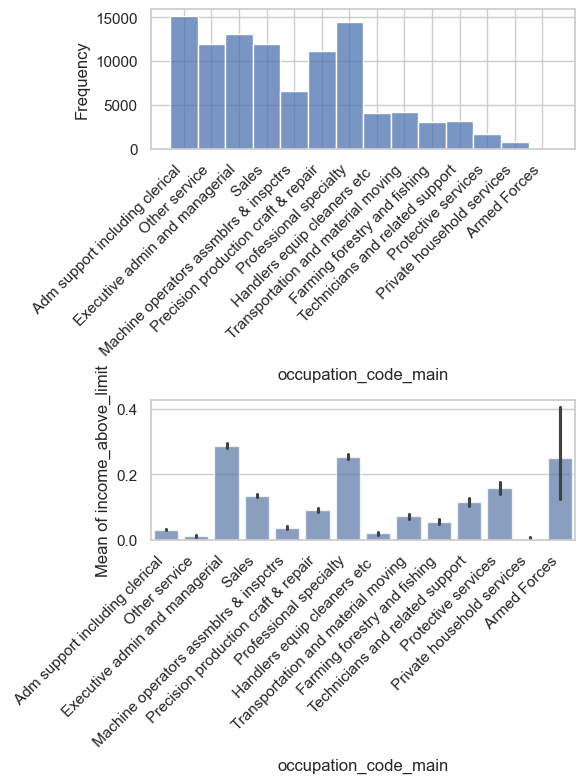

In [63]:
cat_eda(data_18,'occupation_code_main','income_above_limit',45, 11, 12)

In [475]:
# There are many NAs so we will have to create a new NA column
strategy['occupation_code_main']='Add category NA; Use OneHotEncoder'

### Variable 'total_employed'

Categories: total_employed
0    45313
6    37454
1    23357
4    14730
3    13779
2    10190
5     6089
Name: count, dtype: int64 
% NA: 0.0 %


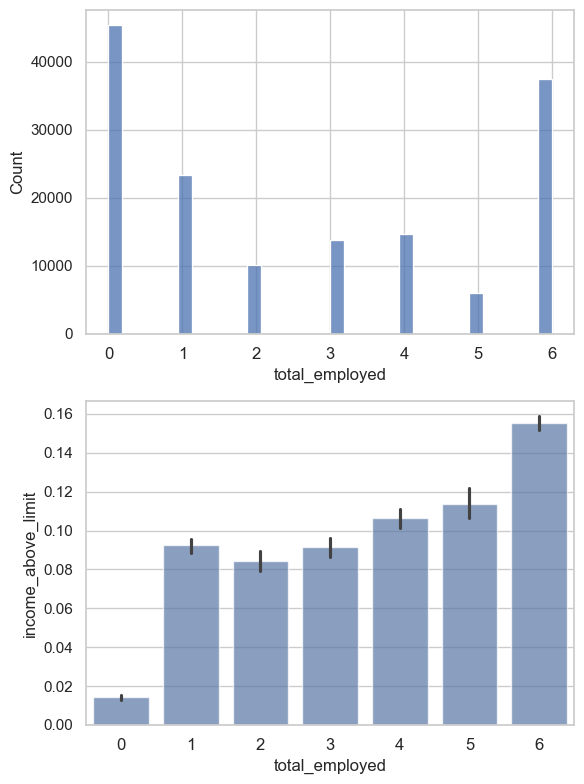

In [476]:
cat_eda(data_18,'total_employed','income_above_limit')

In [477]:
## Can't find what values mean. Will drop. 
strategy['total_employed']='Drop'
drop_col.append('total_employed')

### Variable 'household_stat'

Categories: household_stat
 Householder                                   56158
 Spouse of householder                         43546
 Nonfamily householder                         23248
 Child 18+ never marr Not in a subfamily       12784
 Secondary individual                           6005
 Other Rel 18+ ever marr not in subfamily       2071
 Other Rel 18+ never marr not in subfamily      1781
 Child 18+ ever marr Not in a subfamily         1029
 Other Rel 18+ spouse of subfamily RP            697
 Child 18+ ever marr RP of subfamily             691
 Other Rel 18+ ever marr RP of subfamily         679
 RP of unrelated subfamily                       670
 Child 18+ never marr RP of subfamily            619
 Grandchild 18+ never marr not in subfamily      401
 In group quarters                               166
 Child 18+ spouse of subfamily RP                137
 Other Rel 18+ never marr RP of subfamily        109
 Spouse of RP of unrelated subfamily              58
 Grandchild 18+ eve

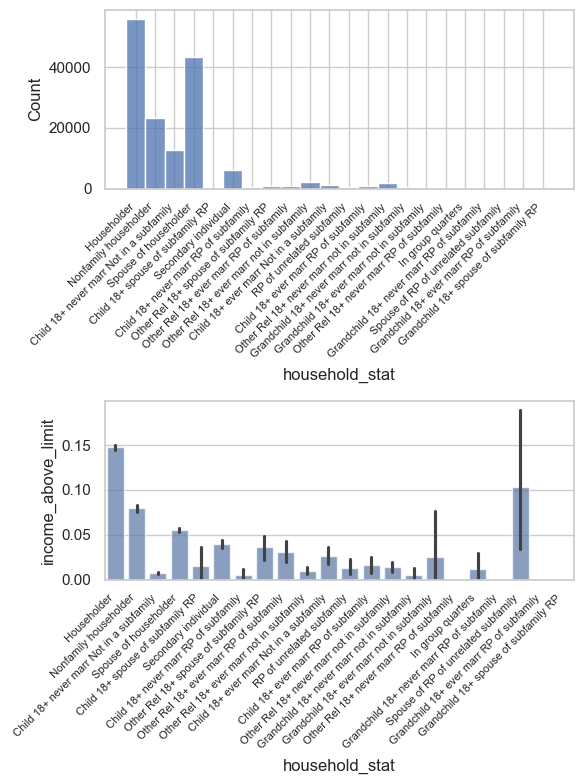

In [478]:
cat_eda(data_18,'household_stat','income_above_limit',45, 8)

In [479]:
# These categories are redundant with the next column. Will drop
strategy['household_stat']='Drop'
drop_col.append('household_stat')

### Variable 'household_summary'

Categories: household_summary
 Householder                             79426
 Spouse of householder                   43555
 Child 18 or older                       15261
 Nonrelative of householder               6743
 Other relative of householder            5805
 Group Quarters- Secondary individual      122
Name: count, dtype: int64 
% NA: 0.0 %


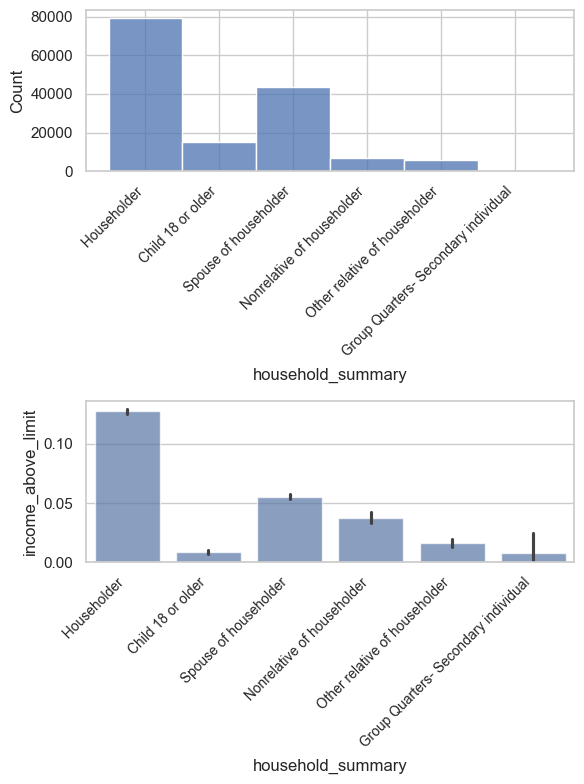

In [480]:
cat_eda(data_18,'household_summary','income_above_limit',45, 10)

In [481]:
# No NAs, will keep
strategy['household_summary']='Use OneHotEncoder'

### Variable 'under_18_family'

Categories: Series([], Name: count, dtype: int64) 
% NA: 100.0 %


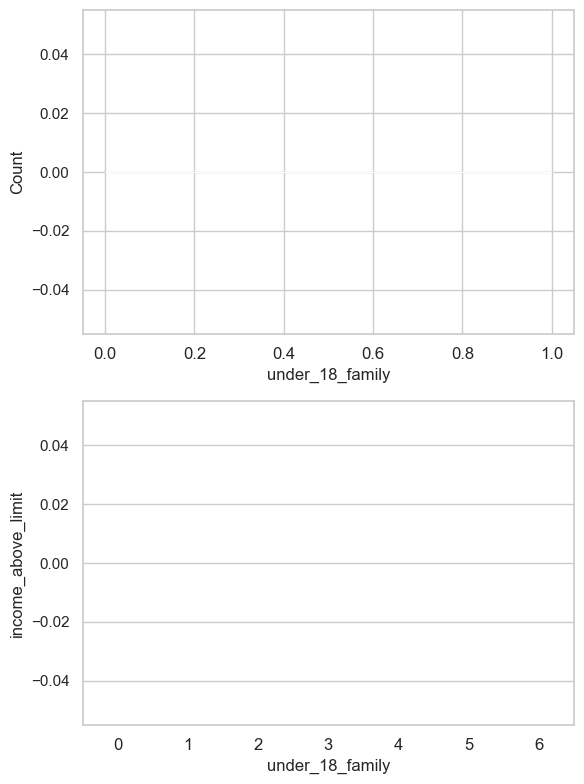

In [482]:
cat_eda(data_18,'under_18_family','income_above_limit')

In [483]:
## 100% NA. Will drop. 
strategy['under_18_family']='Drop'
drop_col.append('under_18_family')

### Variable 'veterans_admin_questionnaire'

Categories: veterans_admin_questionnaire
 No     1680
Same     399
Name: count, dtype: int64 
% NA: 98.62237595419847 %


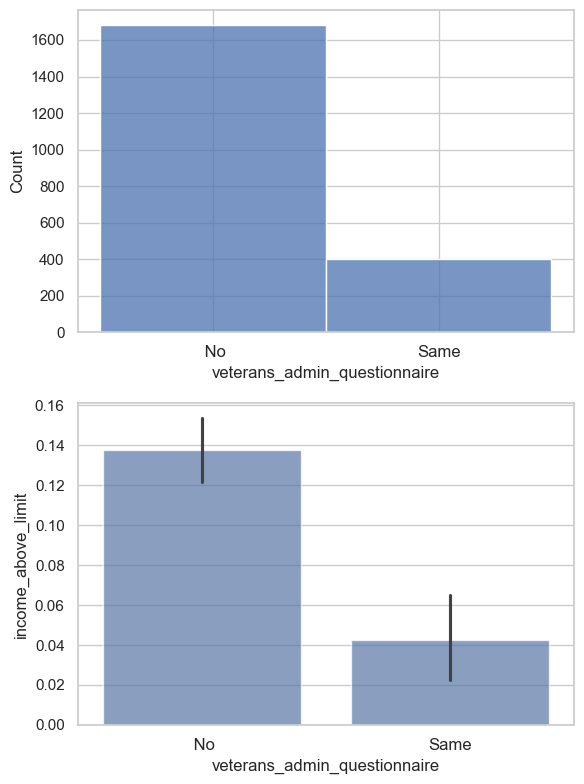

In [485]:
cat_eda(data_18,'veterans_admin_questionnaire','income_above_limit')

In [486]:
# Too many NAs, we have to drop
strategy['veterans_admin_questionnaire']='drop'
drop_col.append('veterans_admin_questionnaire')

### Variable 'vet_benefit'

Categories: vet_benefit
2    148833
1      2079
Name: count, dtype: int64 
% NA: 0.0 %


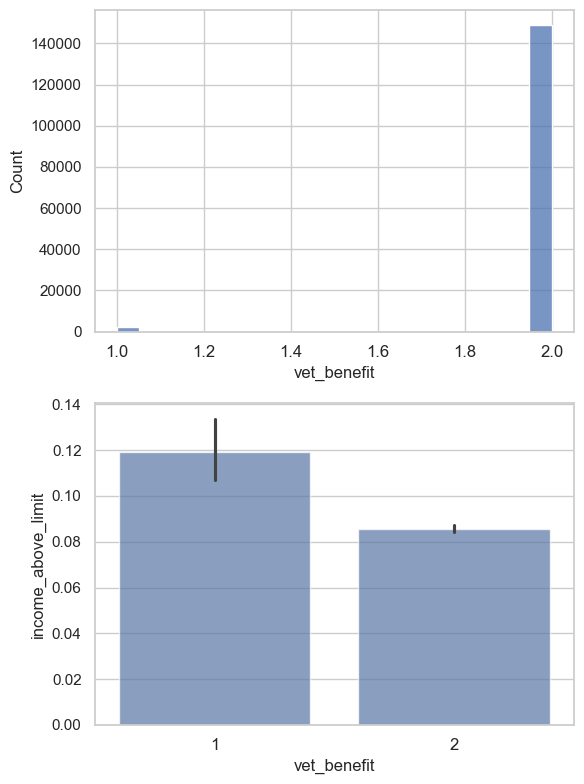

In [487]:
cat_eda(data_18,'vet_benefit','income_above_limit')

In [488]:
# We assume this is 1 = veteran, 2 = not. Will keep. 
strategy['vet_benefit']='1 = veteran, 2 = not. Use OneHotEncoder'

### Variable 'tax_status'

Categories: tax_status
 Joint both under 65             70571
 Single                          37639
 Nonfiler                        21937
 Joint both 65+                   8791
 Head of household                7868
 Joint one under 65 & one 65+     4106
Name: count, dtype: int64 
% NA: 0.0 %


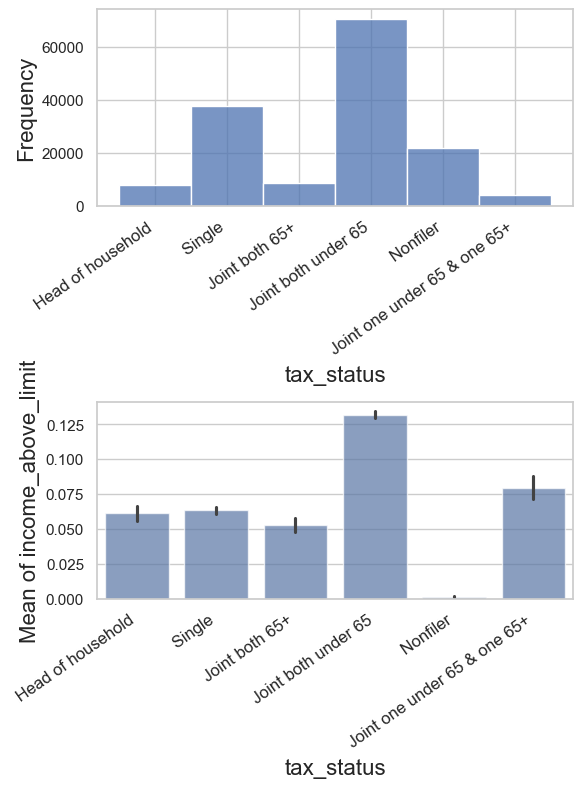

In [67]:
cat_eda(data_18,'tax_status','income_above_limit',35,12, 16)

In [490]:
# No NAs and is helpful. 
strategy['tax_status']='Use OneHotEncoder'

### Variable 'gains'

% NA: 0.0 %


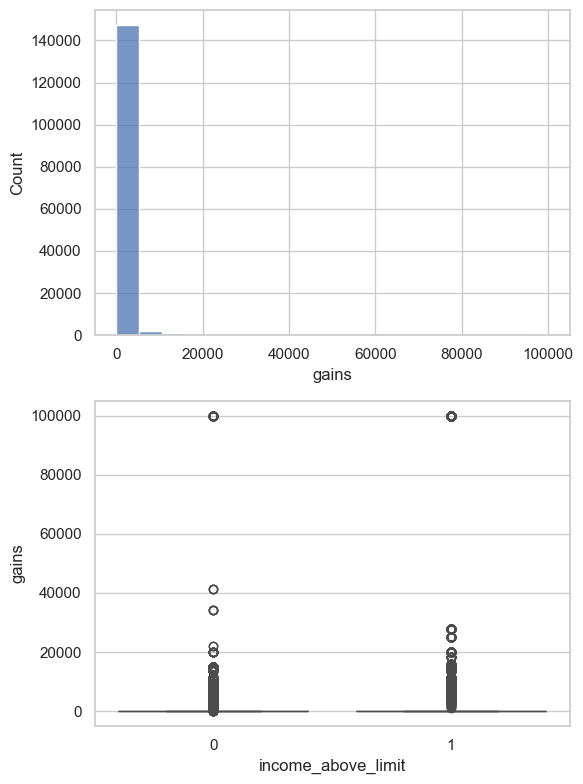

In [491]:
num_eda(data_18,'gains','income_above_limit')

% NA: 0.0 %


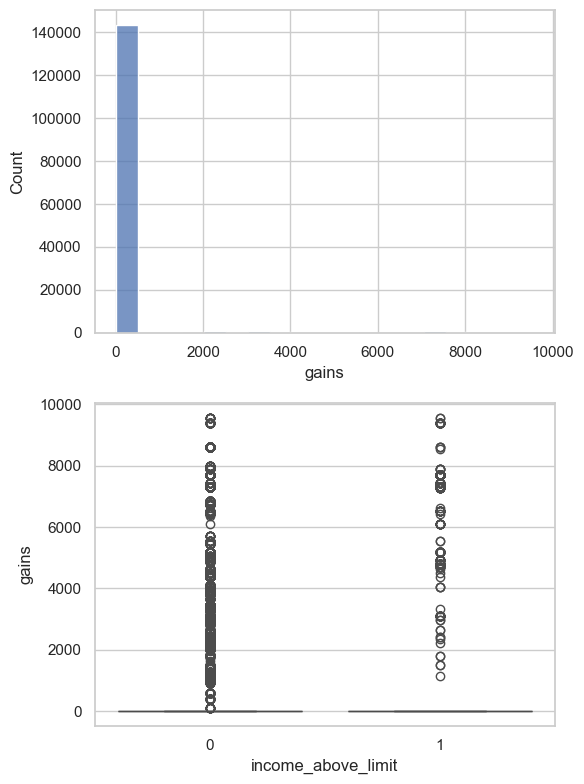

In [492]:
num_eda(data_18[data_18.gains<10000],'gains','income_above_limit')

### Variable 'losses'

% NA: 0.0 %


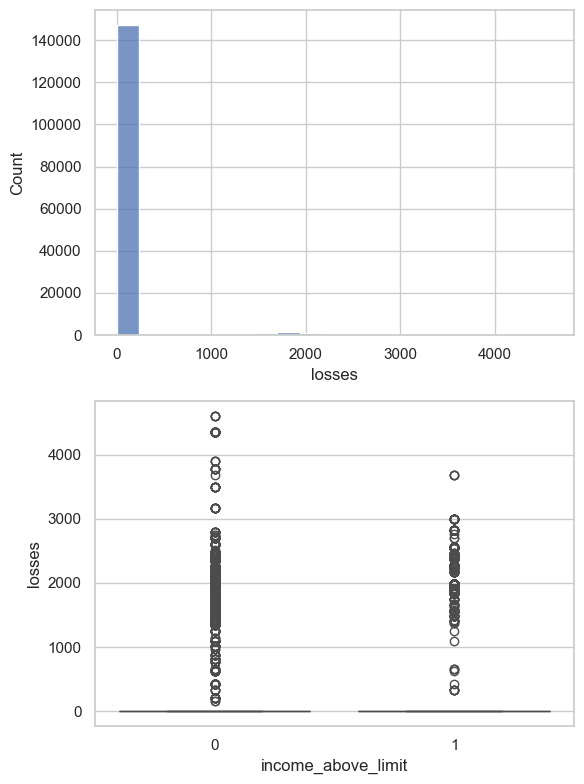

In [493]:
num_eda(data_18,'losses','income_above_limit')

### Variable 'stocks_status'

% NA: 0.0 %


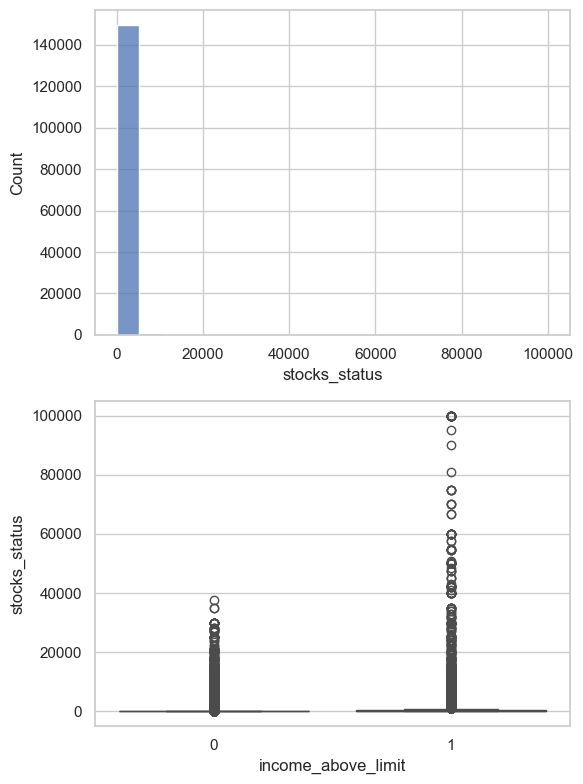

In [494]:
num_eda(data_18,'stocks_status','income_above_limit')

In [495]:
# We will combine losses, gains and status into one "Investor" variable
strategy['gains']='combine into "Investments" variable, then drop'
strategy['losses']='combine into "Investments" variable, then drop'
strategy['stocks_status']='combine into "Investments" variable, then drop '

### Variable 'citizenship'

Categories: citizenship
Native                                          130062
 Foreign born- Not a citizen of U S              12026
 Foreign born- U S citizen by naturalization      5977
 Native- Born abroad of American Parent(s)        1487
 Native- Born in Puerto Rico or U S Outlying      1360
Name: count, dtype: int64 
% NA: 0.0 %


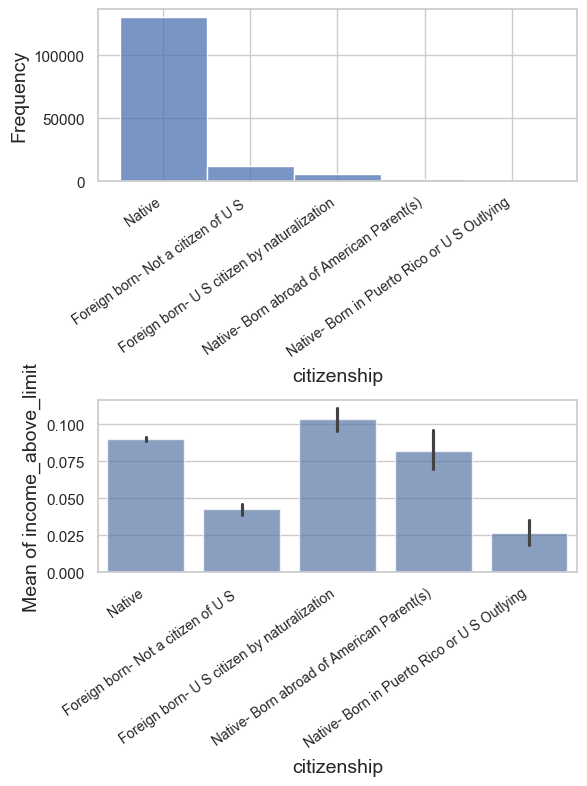

In [68]:
cat_eda(data_18,'citizenship','income_above_limit',35, 10, 14)

In [497]:
# No NAs and is helpful. Will keep
strategy['citizenship']='Impute with the most often. Use OneHotEncoder'

### Variable 'mig_year'

Categories: mig_year
95    75617
94    75295
Name: count, dtype: int64 
% NA: 0.0 %


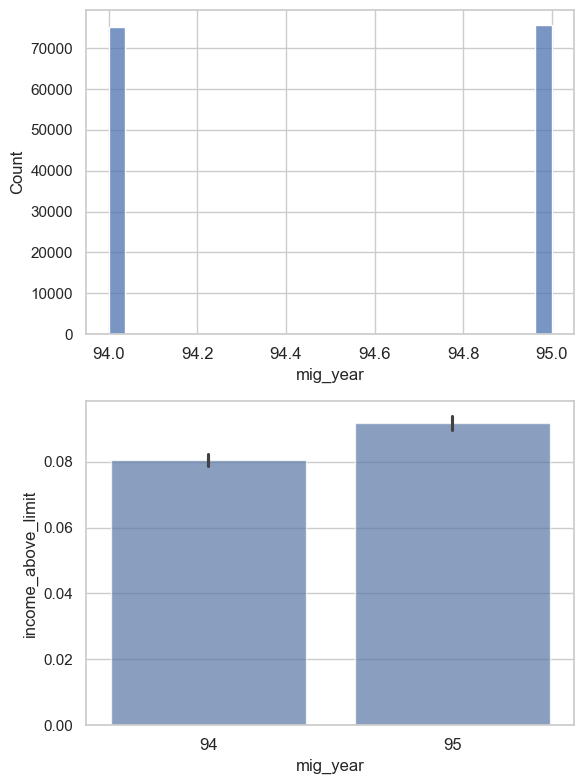

In [498]:
cat_eda(data_18,'mig_year','income_above_limit')

In [499]:
## Not helpful. Will drop. 
strategy['mig_year']='Drop'
drop_col.append('mig_year')

### Variable 'country_of_birth_own'

Categories: country_of_birth_own
US                               130059
 Mexico                            5166
 ?                                 3196
 Puerto-Rico                       1272
 Cuba                               866
 Philippines                        804
 Germany                            693
 Canada                             664
 El-Salvador                        629
 Dominican-Republic                 624
 China                              475
 Italy                              444
 England                            434
 India                              417
 Columbia                           406
 South Korea                        389
 Poland                             369
 Guatemala                          329
 Vietnam                            320
 Jamaica                            315
 Japan                              289
 Ecuador                            253
 Peru                               250
 Nicaragua                          204
 Haiti 

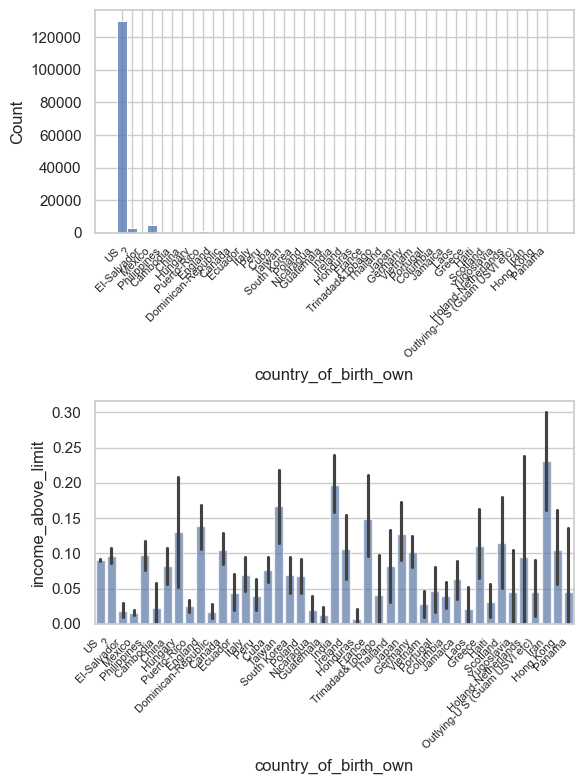

In [500]:
cat_eda(data_18,'country_of_birth_own','income_above_limit',45, 8)

In [501]:
## Too many categories. Will drop. 
strategy['country_of_birth_own']='Drop'
drop_col.append('country_of_birth_own')

### Variable 'country_of_birth_father'

Categories: country_of_birth_father
US                               118889
 Mexico                            6601
 ?                                 5925
 Italy                             2243
 Puerto-Rico                       1933
 Canada                            1263
 Germany                           1228
 Poland                            1196
 Cuba                               936
 Philippines                        897
 Dominican-Republic                 836
 China                              745
 England                            699
 El-Salvador                        690
 Ireland                            541
 India                              476
 Columbia                           456
 South Korea                        390
 Jamaica                            351
 Japan                              334
 Guatemala                          331
 Portugal                           327
 Greece                             326
 Hungary                            324
 Ecu

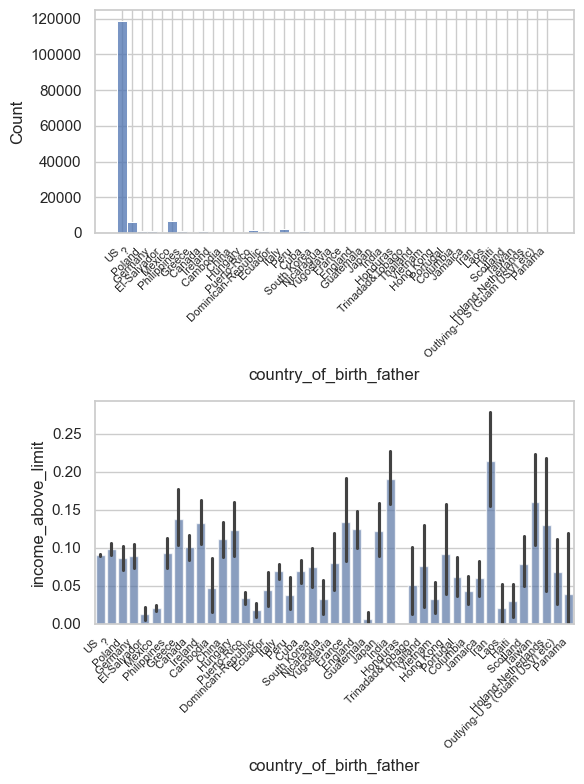

In [502]:
cat_eda(data_18,'country_of_birth_father','income_above_limit',45, 8)

In [503]:
## Too many categories. Will drop. 
strategy['country_of_birth_father']='Drop'
drop_col.append('country_of_birth_father')

### Variable 'country_of_birth_mother'

Categories: country_of_birth_mother
US                               119778
 Mexico                            6587
 ?                                 5340
 Puerto-Rico                       1889
 Italy                             1874
 Canada                            1357
 Germany                           1230
 Poland                            1082
 Cuba                               974
 Philippines                        896
 England                            798
 El-Salvador                        768
 Dominican-Republic                 735
 China                              680
 Ireland                            642
 India                              476
 Columbia                           452
 South Korea                        408
 Japan                              392
 Jamaica                            364
 Guatemala                          334
 Hungary                            315
 Vietnam                            304
 Ecuador                            295
 Por

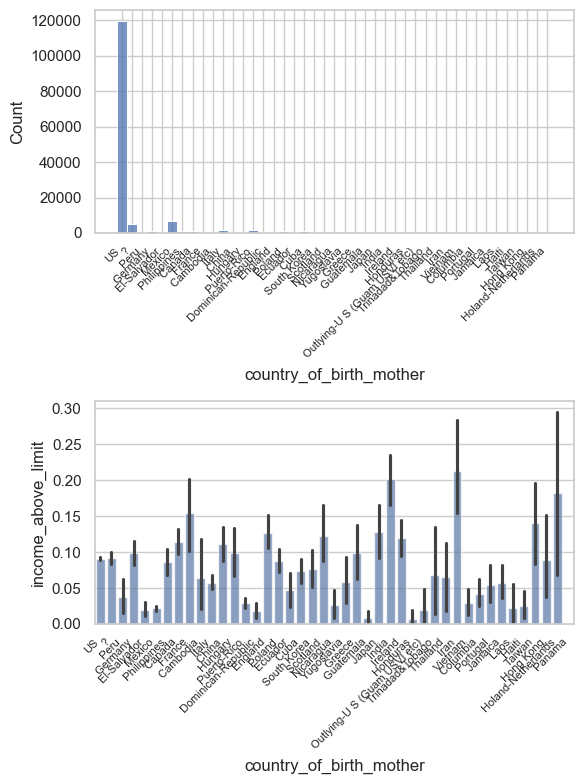

In [504]:
cat_eda(data_18,'country_of_birth_mother','income_above_limit',45, 8)

In [505]:
## Too many categories. Will drop. 
strategy['country_of_birth_mother']='Drop'
drop_col.append('country_of_birth_mother')

### Variable 'migration_code_change_in_msa'

Categories: migration_code_change_in_msa
 ?                   75617
unchanged            63402
 MSA to MSA           8146
 NonMSA to nonMSA     2048
 MSA to nonMSA         548
 NonMSA to MSA         487
 Abroad to MSA         314
 Not identifiable      299
 Abroad to nonMSA       51
Name: count, dtype: int64 
% NA: 0.0 %


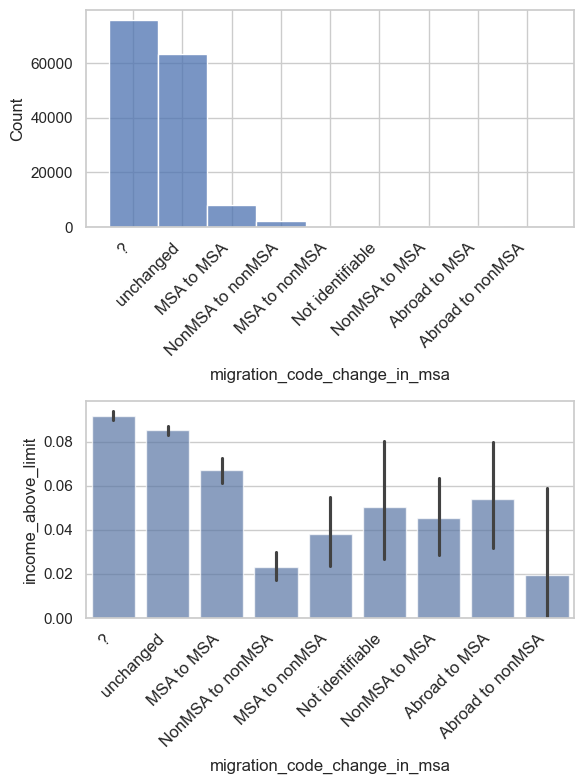

In [506]:
cat_eda(data_18,'migration_code_change_in_msa','income_above_limit',45)

In [507]:
# Not helpful for our analysis. Drop
strategy['migration_code_change_in_msa']='Drop'
drop_col.append('migration_code_change_in_msa')

### Variable 'migration_prev_sunbelt'

Categories: migration_prev_sunbelt
 ?      75617
 No      7556
Same     4337
Name: count, dtype: int64 
% NA: 42.01256361323155 %


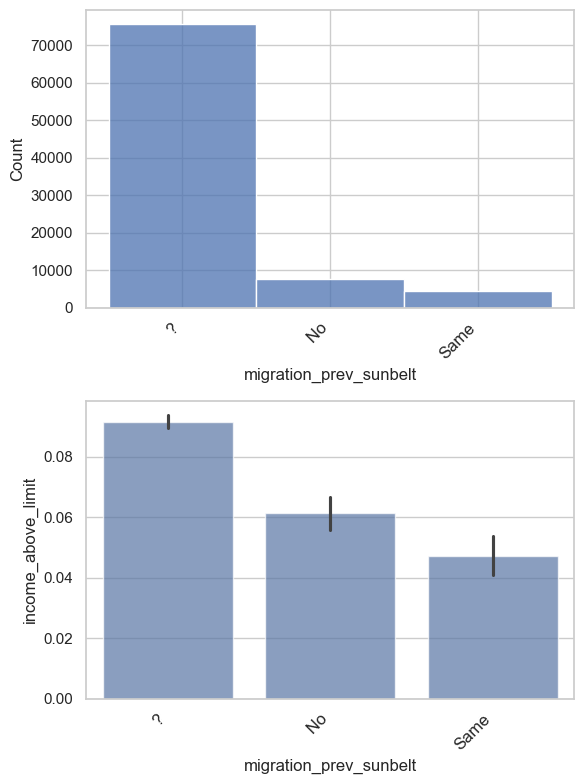

In [508]:
cat_eda(data_18,'migration_prev_sunbelt','income_above_limit',45)

In [509]:
# Not helpful for our analysis. Drop
strategy['migration_prev_sunbelt']='Drop'
drop_col.append('migration_prev_sunbelt')

### Variable 'migration_code_move_within_reg'

Categories: migration_code_move_within_reg
 ?                               75617
unchanged                        63402
 Same county                      7283
 Different county same state      2228
 Different state in South          737
 Different state in West           539
 Different state in Midwest        417
 Abroad                            366
 Different state in Northeast      323
Name: count, dtype: int64 
% NA: 0.0 %


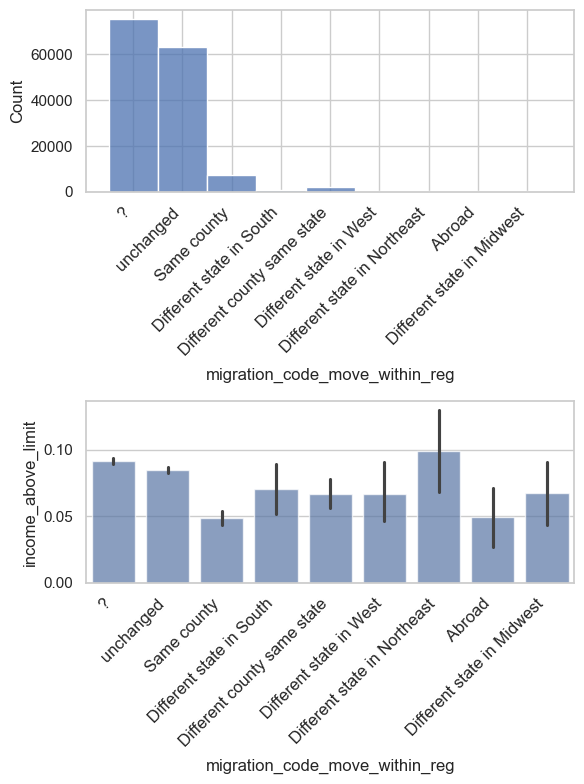

In [510]:
cat_eda(data_18,'migration_code_move_within_reg','income_above_limit',45)

In [511]:
# Not helpful for our analysis. Drop
strategy['migration_code_move_within_reg']='Drop'
drop_col.append('migration_code_move_within_reg')

### Variable 'migration_code_change_in_reg'

Categories: migration_code_change_in_reg
 ?                                 75617
unchanged                          63402
 Same county                        7283
 Different county same state        2228
 Different region                    897
 Different state same division       756
 Abroad                              366
 Different division same region      363
Name: count, dtype: int64 
% NA: 0.0 %


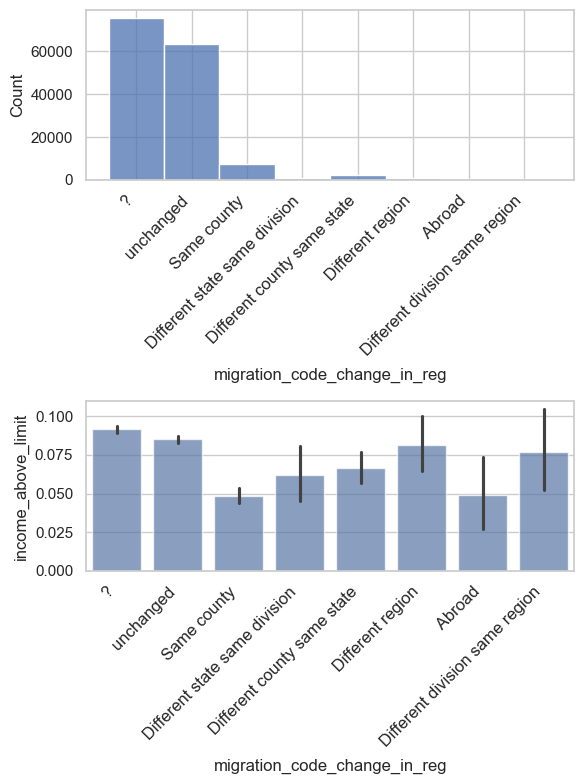

In [512]:
cat_eda(data_18,'migration_code_change_in_reg','income_above_limit',45)

In [513]:
# Not helpful for our analysis. Drop
strategy['migration_code_change_in_reg']='Drop'
drop_col.append('migration_code_change_in_reg')

### Variable 'residence_1_year_ago'

Categories: residence_1_year_ago
Same    63402
 No     11893
Name: count, dtype: int64 
% NA: 50.106684690415605 %


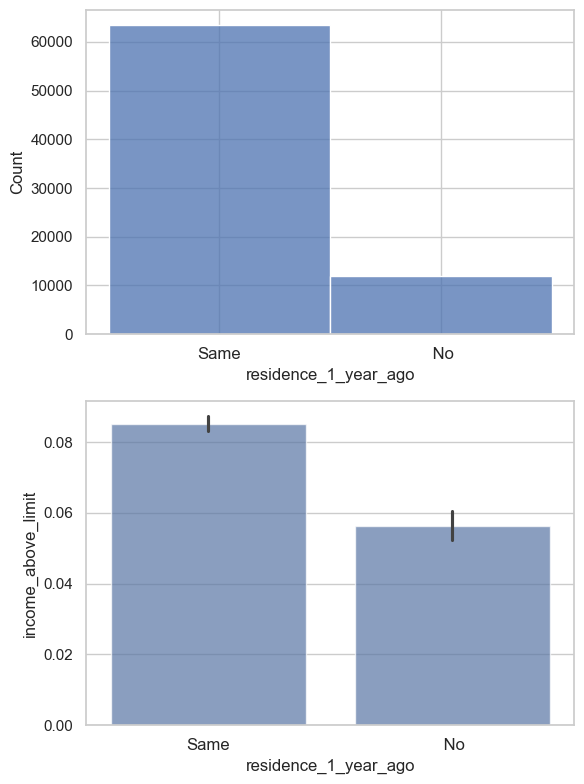

In [514]:
cat_eda(data_18,'residence_1_year_ago','income_above_limit')

In [515]:
# Not helpful for our analysis and tons of NAs. Drop
strategy['residence_1_year_ago']='Drop'
drop_col.append('residence_1_year_ago')

### Variable 'old_residence_reg'

Categories: old_residence_reg
 South        3649
 West         3111
 Midwest      2665
 Northeast    2102
 Abroad        366
Name: count, dtype: int64 
% NA: 92.11924830364715 %


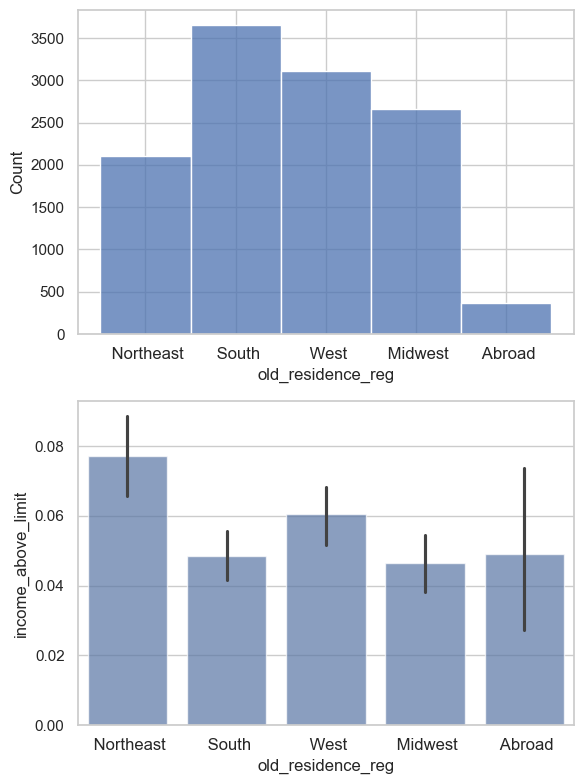

In [516]:
cat_eda(data_18,'old_residence_reg','income_above_limit')

In [517]:
# Not helpful for our analysis and tons of NAs. Drop
strategy['residence_1_year_ago']='Drop'
drop_col.append('residence_1_year_ago')

### Variable 'old_residence_state'

Categories: old_residence_state
 California              1321
 Utah                     762
 Florida                  674
 North Carolina           622
 ?                        555
 Abroad                   460
 Oklahoma                 448
 Minnesota                425
 Indiana                  415
 North Dakota             381
 New Mexico               359
 Michigan                 331
 Colorado                 201
 Alaska                   198
 Arizona                  197
 New Hampshire            190
 Wyoming                  187
 Kentucky                 179
 West Virginia            179
 Ohio                     175
 Alabama                  173
 Oregon                   171
 Montana                  170
 Georgia                  168
 Pennsylvania             159
 Arkansas                 156
 Texas                    155
 Mississippi              151
 Tennessee                147
 Louisiana                144
 New York                 144
 Vermont                  138
 Illinoi

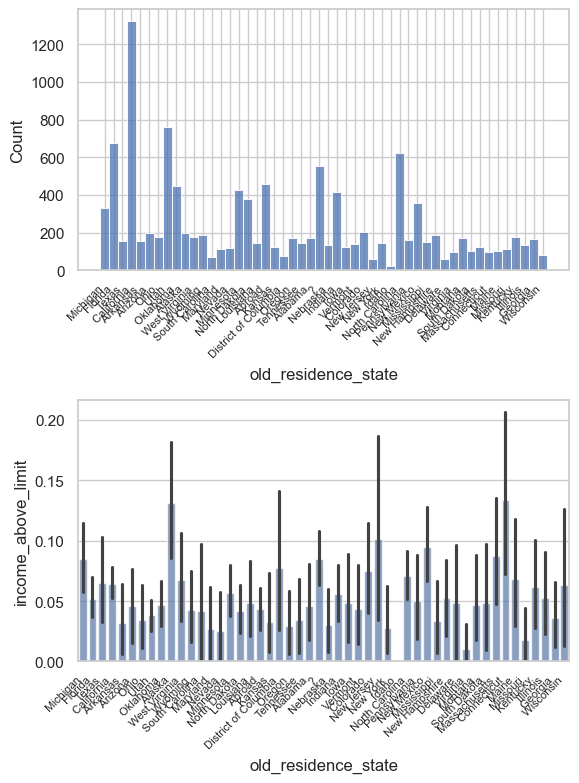

In [518]:
cat_eda(data_18,'old_residence_state','income_above_limit',45, 8)

In [519]:
# Not helpful for our analysis and tons of NAs. Drop
strategy['old_residence_state']='Drop'
drop_col.append('old_residence_state')

### Variable 'importance_of_record'

% NA: 0.0 %


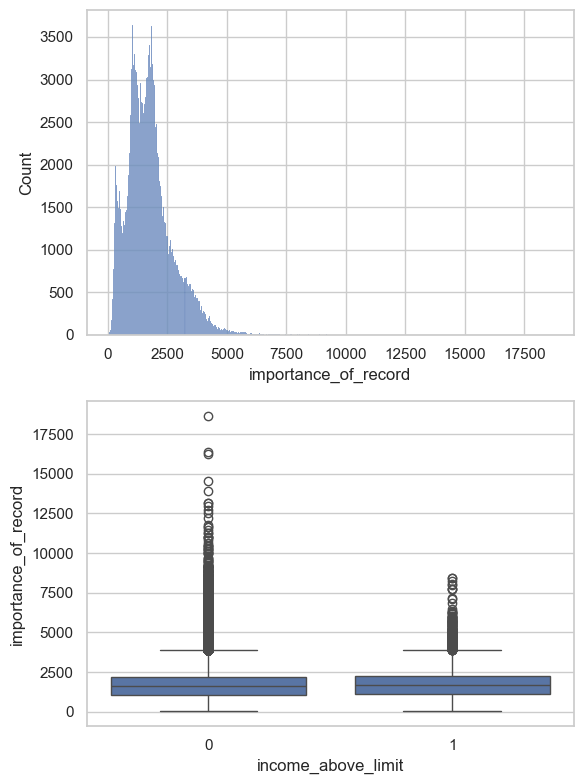

In [520]:
num_eda(data_18,'importance_of_record','income_above_limit')

In [521]:
# Unclear what these are, will drop
strategy['importance_of_record']='Drop'
drop_col.append('importance_of_record')

In [522]:
cat_col = data.columns[data.dtypes==np.object_]
num_col = data.columns[data.dtypes!=np.object_]

In [523]:
num_col

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [524]:
cat_col

Index(['gender', 'education', 'class', 'education_institute', 'marital_status',
       'race', 'is_hispanic', 'employment_commitment', 'unemployment_reason',
       'is_labor_union', 'industry_code_main', 'occupation_code_main',
       'household_stat', 'household_summary', 'under_18_family',
       'veterans_admin_questionnaire', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'income_above_limit_orig'],
      dtype='object')

In [528]:
data_18.to_parquet(os.path.join(DATA_PATH,'eda.gzip'))